Project Title:

Impact of India-Pakistan War (Operation Sindoor) on Indian Stock Market: A Study of Nifty 50 and India VIX

Introduction:

This project analyzes the impact of the India-Pakistan war, initiated after the Pahalgam attack on April 22, 2025 (Operation Sindoor), on the Indian stock market. It focuses on market performance through the Nifty 50 index and investor sentiment via India VIX during the conflict period.

Project Objective:

To analyze how the India-Pakistan war, specifically the Pahalgam attack on April 22, 2025, affected the Indian stock market. We will study the movements in Nifty 50 (as a benchmark of the market's performance) and the India VIX (representing market volatility) around the event, incorporating volume data to understand the market's reaction during this crisis period.

Data Sources:

1. Nifty 50 Index Data
Source: NSE India
Data Range: April 22, 2025 – May 10, 2025 (to cover pre-war, during, and post-war phases)

2. India VIX (Volatility Index)
Source: NSE India
Data Range: Same as above

News/Event Timeline
Major event markers such as:

April 22, 2025 – Pahalgam Attack

April 23, 2025 – Announcement of Operation Sindoor

Subsequent key military or political statements

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty = pd.read_csv(r"C:\Users\RenukaHebasur\NIFTY 50-22-04-2025-to-10-05-2025.csv")
vix = pd.read_csv(r"C:\Users\RenukaHebasur\hist_india_vix_-22-04-2025-to-10-05-2025.csv")

# Preview
print(nifty.head())
print(vix.head())


         Date      Open      High       Low     Close   Shares Traded   \
0  22-APR-2025  24185.40  24242.60  24072.00  24167.25       440940490   
1  23-APR-2025  24357.60  24359.30  24119.95  24328.95       415042544   
2  24-APR-2025  24277.90  24347.85  24216.15  24246.70       358768165   
3  25-APR-2025  24289.00  24365.45  23847.85  24039.35       387741866   
4  28-APR-2025  24070.25  24355.10  24054.05  24328.50       320467976   

   Turnover (₹ Cr)  
0         35479.29  
1         34527.08  
2         33057.29  
3         33430.86  
4         28278.82  
         Date     Open     High      Low   Close   Prev. Close   Change   \
0  22-APR-2025  15.5150  16.0075  14.5400   15.23       15.5150    -0.29   
1  23-APR-2025  15.2300  16.5175  12.8425   15.96       15.2300     0.73   
2  24-APR-2025  15.9600  16.7625  15.5525   16.25       15.9600     0.29   
3  25-APR-2025  16.2500  17.5750  15.9150   17.16       16.2500     0.91   
4  28-APR-2025  17.1575  18.0725  16.6225   16.94

In [10]:
nifty.isnull().sum(), vix.isnull().sum()

(Date               0
 Open               0
 High               0
 Low                0
 Close              0
 Shares Traded      0
 Turnover (₹ Cr)    0
 dtype: int64,
 Date            0
 Open            0
 High            0
 Low             0
 Close           0
 Prev. Close     0
 Change          0
 % Change        0
 dtype: int64)

In [11]:
nifty.columns, vix.columns


(Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
        'Turnover (₹ Cr)'],
       dtype='object'),
 Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Prev. Close ', 'Change ',
        '% Change '],
       dtype='object'))

In [12]:
# Rename Nifty columns
nifty = nifty.rename(columns={
    'Close': 'Nifty_Close',
    'Shares Traded': 'Nifty_Volume'
})

# Rename VIX column
vix = vix.rename(columns={
    'Close': 'Vix_Close'
})


In [13]:
nifty.columns, vix.columns


(Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
        'Turnover (₹ Cr)'],
       dtype='object'),
 Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Prev. Close ', 'Change ',
        '% Change '],
       dtype='object'))

In [14]:
print(nifty.columns.tolist())


['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']


In [15]:
nifty.columns = nifty.columns.str.strip()


In [16]:
nifty = nifty.rename(columns={'Shares Traded': 'Nifty_Volume', "Close": "Nifty_Close"})


In [17]:
nifty.columns

Index(['Date', 'Open', 'High', 'Low', 'Nifty_Close', 'Nifty_Volume',
       'Turnover (₹ Cr)'],
      dtype='object')

In [18]:
vix.columns = vix.columns.str.strip()

In [19]:
vix = vix.rename(columns={"Close": "Vix_Close"})


In [20]:
vix.columns

Index(['Date', 'Open', 'High', 'Low', 'Vix_Close', 'Prev. Close', 'Change',
       '% Change'],
      dtype='object')

In [21]:
nifty['Date'] = pd.to_datetime(nifty['Date'], format='%d-%b-%Y')
vix['Date'] = pd.to_datetime(vix['Date'], format='%d-%b-%Y')


In [22]:
print(nifty['Date'].head())


0   2025-04-22
1   2025-04-23
2   2025-04-24
3   2025-04-25
4   2025-04-28
Name: Date, dtype: datetime64[ns]


In [23]:
combined = pd.merge(nifty, vix, on='Date', how='inner')


In [24]:
combined.sort_values('Date', inplace=True)


In [25]:
print(combined.columns)


Index(['Date', 'Open_x', 'High_x', 'Low_x', 'Nifty_Close', 'Nifty_Volume',
       'Turnover (₹ Cr)', 'Open_y', 'High_y', 'Low_y', 'Vix_Close',
       'Prev. Close', 'Change', '% Change'],
      dtype='object')


In [26]:
combined = pd.merge(nifty, vix, on='Date', how='inner')


In [27]:
print(nifty.columns)  # Should show 'Date'
print(vix.columns)    # Should show 'Date'


Index(['Date', 'Open', 'High', 'Low', 'Nifty_Close', 'Nifty_Volume',
       'Turnover (₹ Cr)'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Vix_Close', 'Prev. Close', 'Change',
       '% Change'],
      dtype='object')


In [28]:
combined['Date'] = nifty['Date']  # Assuming Date exists in nifty


In [29]:
combined.rename(columns={'Date_x': 'Date'}, inplace=True)  # Adjust based on actual name


In [30]:
combined.set_index('Date', inplace=True)


In [31]:
combined.columns

Index(['Open_x', 'High_x', 'Low_x', 'Nifty_Close', 'Nifty_Volume',
       'Turnover (₹ Cr)', 'Open_y', 'High_y', 'Low_y', 'Vix_Close',
       'Prev. Close', 'Change', '% Change'],
      dtype='object')

In [32]:
combined.rename(columns={
    'Open_x': 'Nifty_Open',
    'High_x': 'Nifty_High',
    'Low_x': 'Nifty_Low',
    'Turnover (₹ Cr)': 'Nifty_Turnover',
    'Open_y': 'VIX_Open',
    'High_y': 'VIX_High',
    'Low_y': 'VIX_Low',
    'Prev. Close': 'VIX_Prev_Close',
    'Change': 'VIX_Change',
    '% Change': 'VIX_Percent_Change'
}, inplace=True)


In [33]:
combined.columns

Index(['Nifty_Open', 'Nifty_High', 'Nifty_Low', 'Nifty_Close', 'Nifty_Volume',
       'Nifty_Turnover', 'VIX_Open', 'VIX_High', 'VIX_Low', 'Vix_Close',
       'VIX_Prev_Close', 'VIX_Change', 'VIX_Percent_Change'],
      dtype='object')

In [34]:
combined

,Nifty_Open,Nifty_High,Nifty_Low,Nifty_Close,Nifty_Volume,Nifty_Turnover,VIX_Open,VIX_High,VIX_Low,Vix_Close,VIX_Prev_Close,VIX_Change,VIX_Percent_Change
Date,,,,,,,,,,,,,
2025-04-22,24185.40,24242.60,24072.00,24167.25,440940490,35479.29,15.5150,16.0075,14.5400,15.23,15.5150,-0.29,-1.84
2025-04-23,24357.60,24359.30,24119.95,24328.95,415042544,34527.08,15.2300,16.5175,12.8425,15.96,15.2300,0.73,4.79
2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,16.25,15.9600,0.29,1.82
2025-04-25,24289.00,24365.45,23847.85,24039.35,387741866,33430.86,16.2500,17.5750,15.9150,17.16,16.2500,0.91,5.60
2025-04-28,24070.25,24355.10,24054.05,24328.50,320467976,28278.82,17.1575,18.0725,16.6225,16.94,17.1575,-0.22,-1.27
2025-04-29,24370.70,24457.65,24290.75,24335.95,357563224,30436.88,16.9400,17.5850,16.0650,17.37,16.9400,0.43,2.54
2025-04-30,24342.05,24396.15,24198.75,24334.20,424452559,41073.48,17.3700,18.5600,15.9850,18.22,17.3700,0.85,4.89
2025-05-02,24311.90,24589.15,24238.50,24346.70,421112627,34043.27,18.2225,18.8625,17.3500,18.26,18.2225,0.04,0.21
2025-05-05,24419.50,24526.40,24400.65,24461.15,291471628,26918.36,18.2575,18.7950,18.0675,18.34,18.2575,0.08,0.45


✅ 1. Nifty vs VIX – Line Plot (Time Series Trend)

This helps analyze the relationship between market performance and volatility.

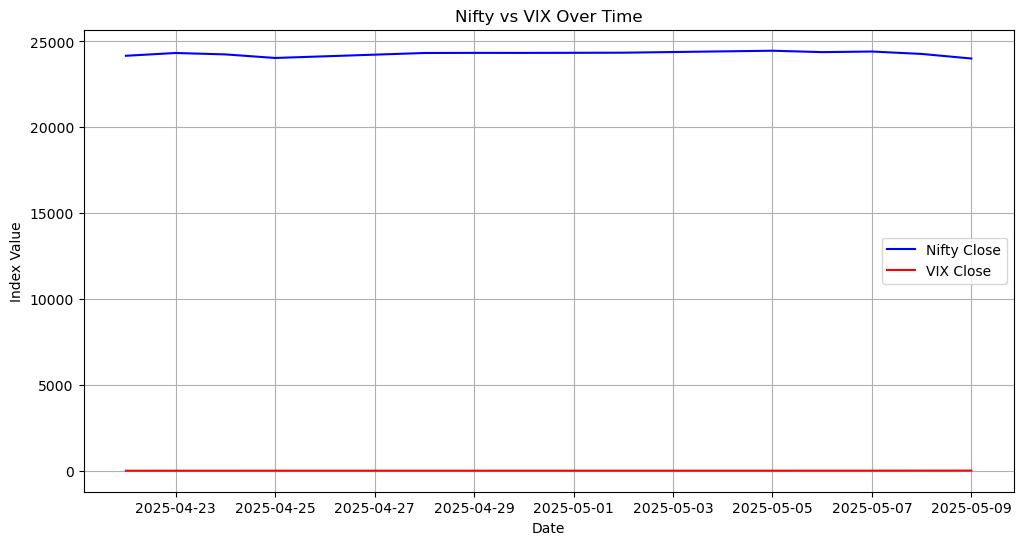

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Nifty_Close'], label='Nifty Close', color='blue')
plt.plot(combined.index, combined['Vix_Close'], label='VIX Close', color='red')
plt.title('Nifty vs VIX Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


✅ 2. Volume vs Volatility – Scatter Plot

This shows how traded volume relates to market volatility.

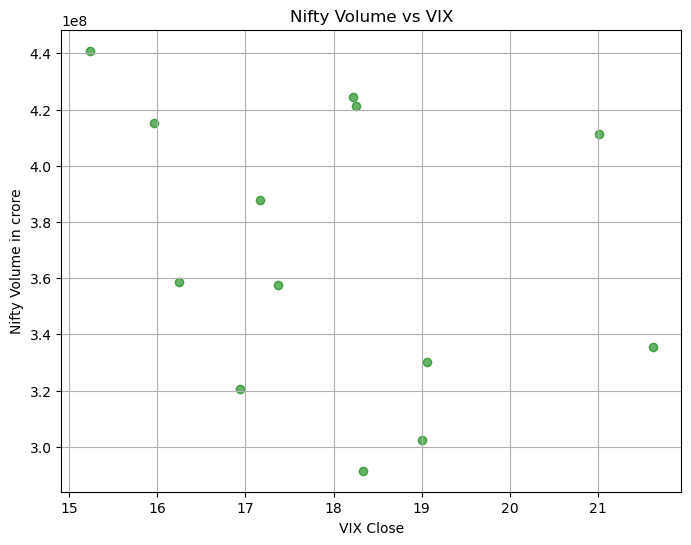

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(combined['Vix_Close'], combined['Nifty_Volume'], alpha=0.6, color='green')
plt.title('Nifty Volume vs VIX')
plt.xlabel('VIX Close')
plt.ylabel('Nifty Volume in crore')
plt.grid(True)
plt.show()


✅ 3. Rolling Average of Nifty and VIX (Smoothing)

This gives a smoothed view of trends over a moving window.

In [40]:
combined['Nifty_MA_2'] = combined['Nifty_Close'].rolling(window=2).mean()
combined['VIX_MA_2'] = combined['Vix_Close'].rolling(window=2).mean()


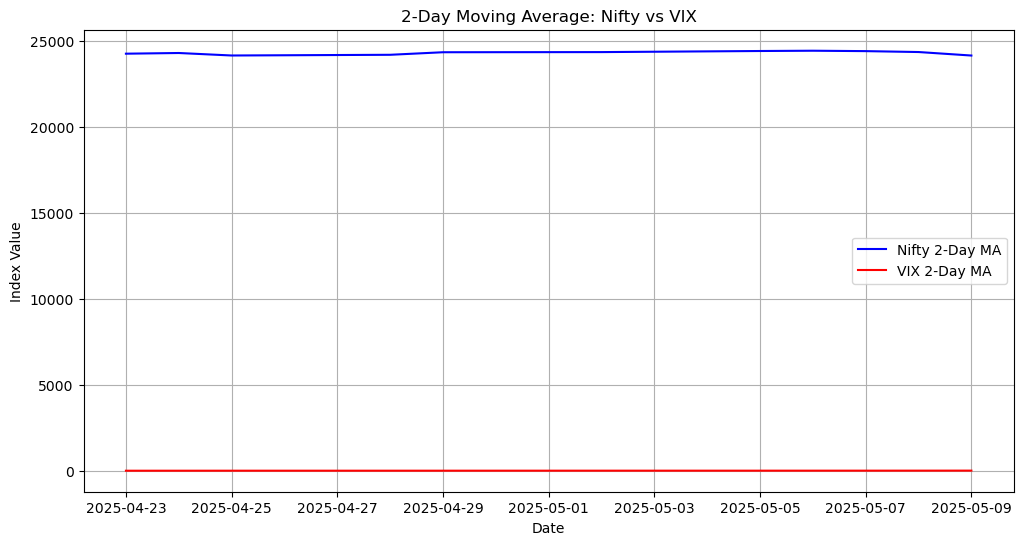

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(combined['Nifty_MA_2'].dropna(), label='Nifty 2-Day MA', color='blue')
plt.plot(combined['VIX_MA_2'].dropna(), label='VIX 2-Day MA', color='red')
plt.title('2-Day Moving Average: Nifty vs VIX')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


✅ 4. Short vs Long Moving Average (Trend Indicator)

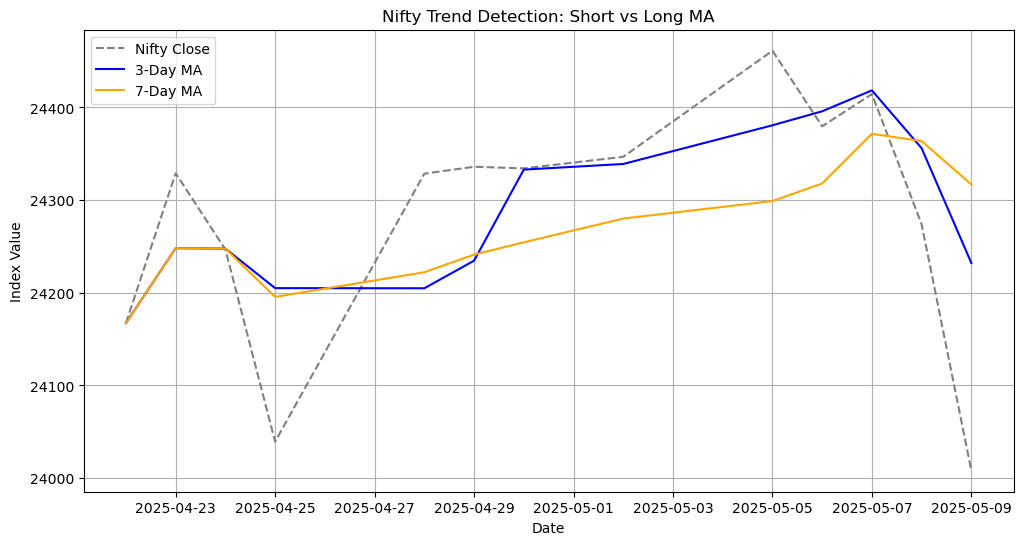

In [43]:
combined['Short_MA'] = combined['Nifty_Close'].rolling(window=3, min_periods=1).mean()
combined['Long_MA'] = combined['Nifty_Close'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Nifty_Close'], label='Nifty Close', color='gray', linestyle='--')
plt.plot(combined.index, combined['Short_MA'], label='3-Day MA', color='blue')
plt.plot(combined.index, combined['Long_MA'], label='7-Day MA', color='orange')
plt.title('Nifty Trend Detection: Short vs Long MA')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


Interpretation:

When short MA crosses above long MA → uptrend

When short MA crosses below long MA → downtrend

📊 5. Volatility Analysis (Using VIX)

✅ Visualize VIX Fluctuation (Volatility Proxy)

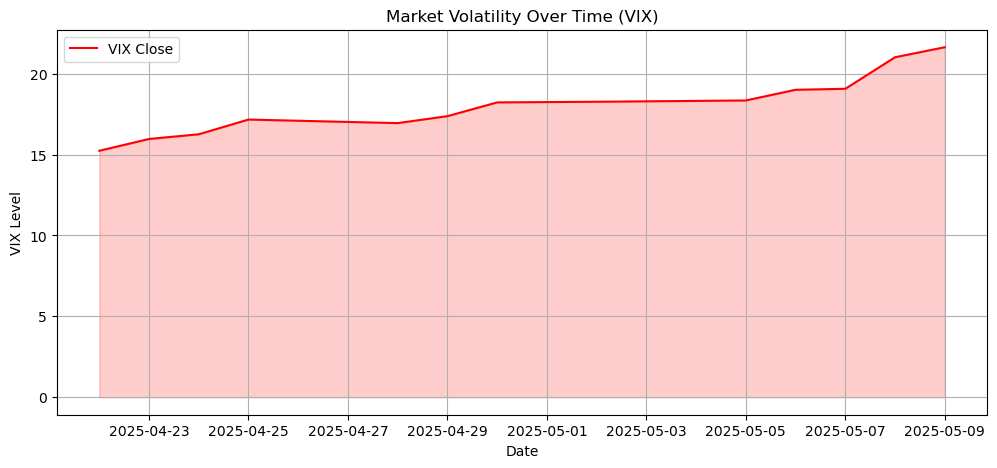

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(combined.index, combined['Vix_Close'], label='VIX Close', color='red')
plt.fill_between(combined.index, combined['Vix_Close'], alpha=0.2, color='red')
plt.title('Market Volatility Over Time (VIX)')
plt.xlabel('Date')
plt.ylabel('VIX Level')
plt.grid(True)
plt.legend()
plt.show()


✅6. Optional: % Daily Change (Volatility Metric)

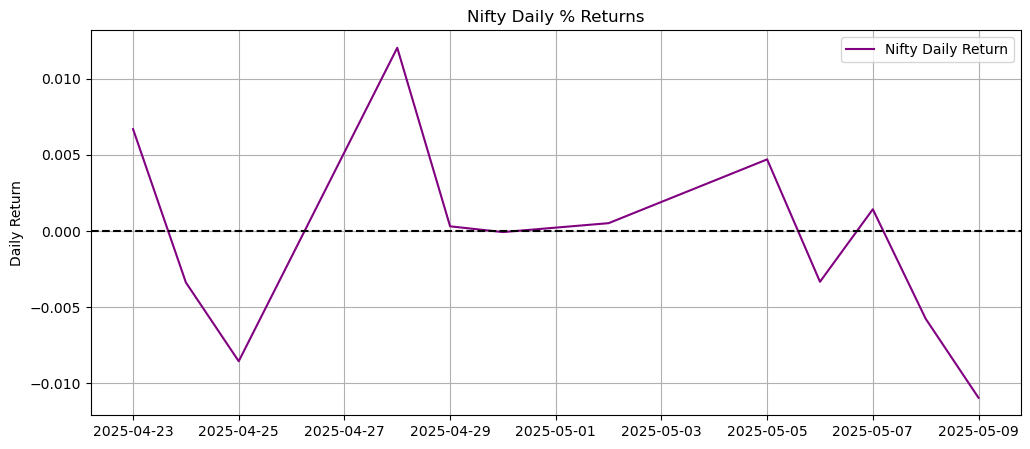

In [48]:
combined['Nifty_Daily_Return'] = combined['Nifty_Close'].pct_change()

plt.figure(figsize=(12, 5))
plt.plot(combined.index, combined['Nifty_Daily_Return'], label='Nifty Daily Return', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Nifty Daily % Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.legend()
plt.show()


🔍 7.VOLATILITY SPIKE DETECTION
We’ll detect days where VIX or Nifty daily return changes unusually.

✅ Identify Volatility Spikes (VIX > 75th percentile)

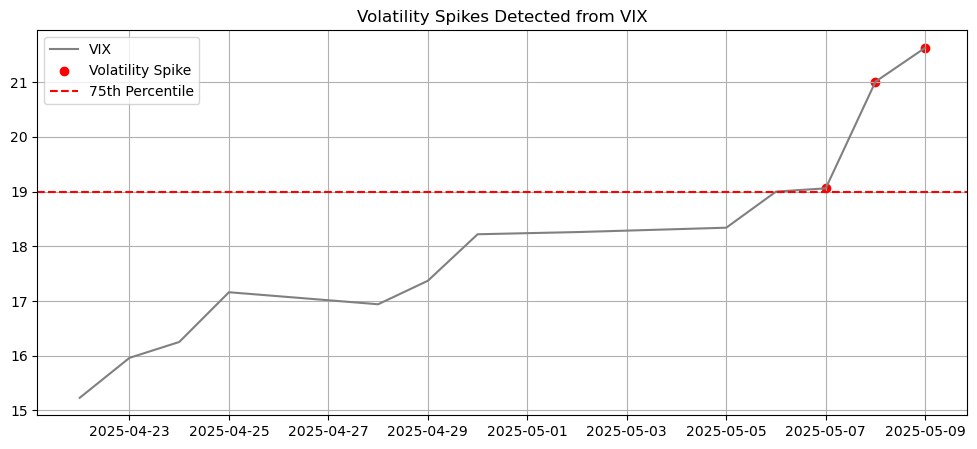

In [50]:
import numpy as np

vix_threshold = np.percentile(combined['Vix_Close'].dropna(), 75)
vol_spikes = combined[combined['Vix_Close'] > vix_threshold]

plt.figure(figsize=(12, 5))
plt.plot(combined.index, combined['Vix_Close'], label='VIX', color='gray')
plt.scatter(vol_spikes.index, vol_spikes['Vix_Close'], color='red', label='Volatility Spike')
plt.axhline(vix_threshold, color='red', linestyle='--', label='75th Percentile')
plt.title('Volatility Spikes Detected from VIX')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
print(combined[['Nifty_Close', 'Vix_Close']].isna().sum())


Nifty_Close    0
Vix_Close      0
dtype: int64


In [52]:
combined.dropna(subset=['Nifty_Close', 'Vix_Close'], inplace=True)

📈 8.SIGNAL-BASED STRATEGY (Trend Reversal Indicator)

Use moving average crossovers as buy/sell signals:

C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_13172\2470940742.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined['Signal'][combined['Short_MA'] > combined['Long_MA']] = 1
C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_1

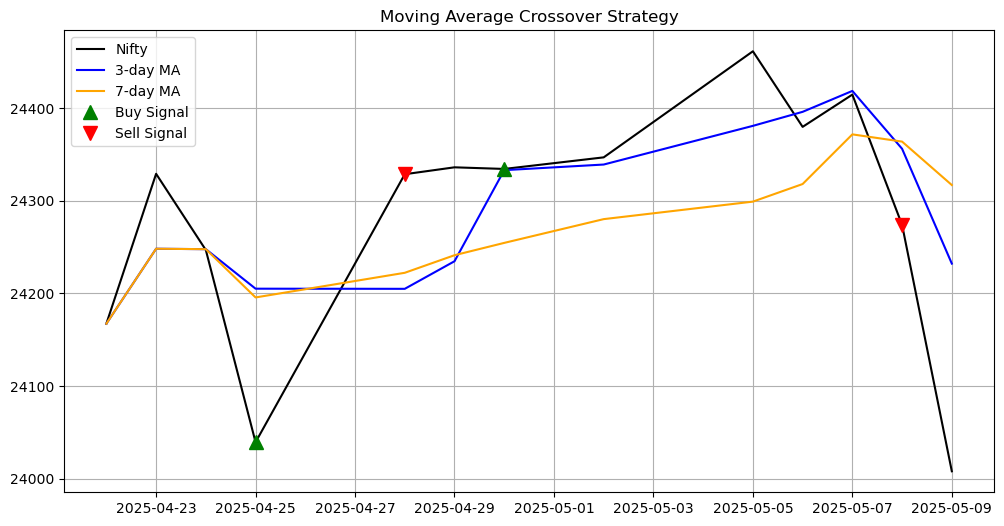

In [54]:
combined['Signal'] = 0
combined['Signal'][combined['Short_MA'] > combined['Long_MA']] = 1
combined['Position'] = combined['Signal'].diff()

# Plot signals
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Nifty_Close'], label='Nifty', color='black')
plt.plot(combined.index, combined['Short_MA'], label='3-day MA', color='blue')
plt.plot(combined.index, combined['Long_MA'], label='7-day MA', color='orange')
plt.plot(combined[combined['Position'] == 1].index,
         combined['Nifty_Close'][combined['Position'] == 1],
         '^', markersize=10, color='green', label='Buy Signal')
plt.plot(combined[combined['Position'] == -1].index,
         combined['Nifty_Close'][combined['Position'] == -1],
         'v', markersize=10, color='red', label='Sell Signal')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.grid(True)
plt.show()


🔮9. FORECASTING (Next 7-Day Trend)

For a small dataset, we’ll use Exponential Smoothing (ETS):

C:\Users\RenukaHebasur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RenukaHebasur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\RenukaHebasur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


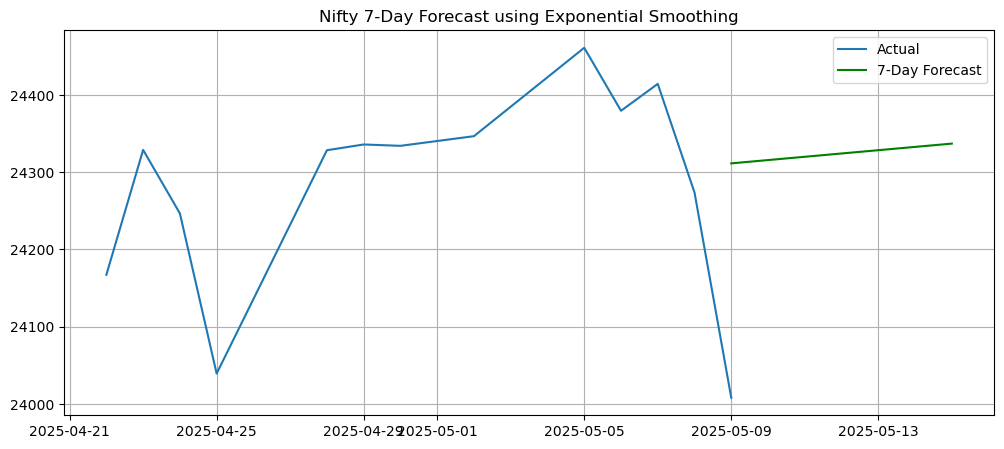

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(combined['Nifty_Close'], trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(steps=7)

plt.figure(figsize=(12, 5))
plt.plot(combined.index, combined['Nifty_Close'], label='Actual')
plt.plot(pd.date_range(combined.index[-1], periods=7, freq='D'),
         forecast, label='7-Day Forecast', color='green')
plt.title('Nifty 7-Day Forecast using Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()


✅ 10. Analyze Nifty vs VIX Relationship

Check how volatility (VIX) impacts Nifty:

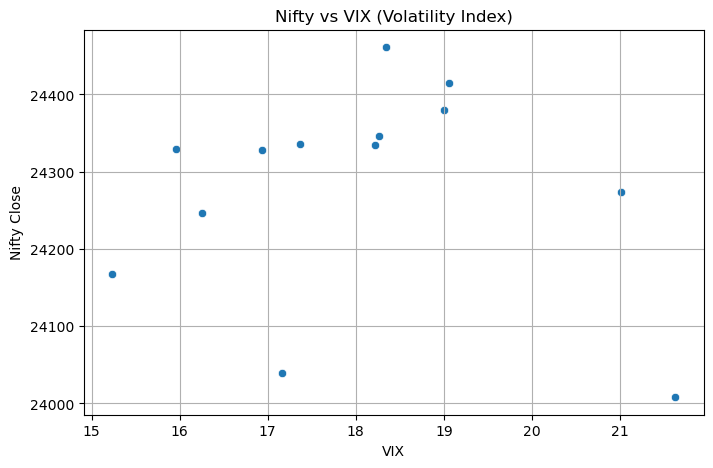

Correlation:              Vix_Close  Nifty_Close
Vix_Close     1.000000    -0.094601
Nifty_Close  -0.094601     1.000000


In [58]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined['Vix_Close'], y=combined['Nifty_Close'])
plt.title('Nifty vs VIX (Volatility Index)')
plt.xlabel('VIX')
plt.ylabel('Nifty Close')
plt.grid(True)
plt.show()

# Correlation
print("Correlation:", combined[['Vix_Close', 'Nifty_Close']].corr())


✅ 11. Add Daily Returns for Analysis

In [60]:
combined['Nifty_Returns'] = combined['Nifty_Close'].pct_change()
combined['VIX_Change'] = combined['Vix_Close'].pct_change()


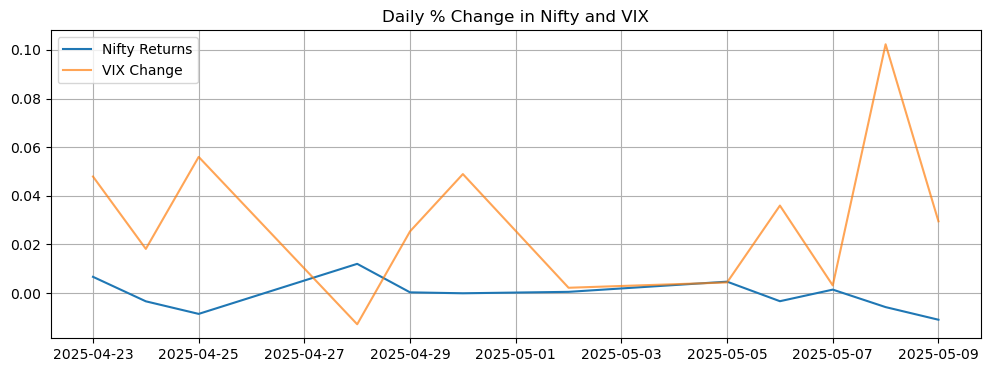

In [61]:
plt.figure(figsize=(12, 4))
plt.plot(combined.index, combined['Nifty_Returns'], label='Nifty Returns')
plt.plot(combined.index, combined['VIX_Change'], label='VIX Change', alpha=0.7)
plt.title('Daily % Change in Nifty and VIX')
plt.legend()
plt.grid(True)
plt.show()


✅ 12. Build Predictive Model (Linear Regression)

Test if VIX can help predict Nifty returns:

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = combined[['VIX_Change', 'Nifty_Returns']].dropna()
X = df[['VIX_Change']]
y = df['Nifty_Returns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression().fit(X_train, y_train)

print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))


Model Coefficient: [-0.1502422]
Model Intercept: 0.004764551190659485
R^2 Score: -1.0572862823068263


In [64]:
import requests

# Set your News API key here
api_key = "72a45d17975148cba9b65221972d3dad" 
url = f'https://newsapi.org/v2/everything?q="India-Pakistan tensions"&from=2025-04-22&to=2025-05-09&apiKey={api_key}'



response = requests.get(url)

# Check the raw response
print(response.status_code)  # This will print the status code
print(response.json())  # This will print the raw response


200
{'status': 'ok', 'totalResults': 465, 'articles': [{'source': {'id': None, 'name': 'NPR'}, 'author': 'Diaa Hadid', 'title': 'India-Pakistan tensions escalate after deadly Kashmir attack', 'description': 'A day after India suspended a water-sharing treaty and downgraded diplomatic ties with Pakistan, authorities in Islamabad closed airspace to Indian aircraft and suspended all trade with India.', 'url': 'https://www.npr.org/2025/04/24/g-s1-62469/india-pakistan-kashmir-attack-tensions', 'urlToImage': 'https://npr.brightspotcdn.com/dims3/default/strip/false/crop/4155x2337+0+216/resize/1400/quality/100/format/jpeg/?url=http%3A%2F%2Fnpr-brightspot.s3.amazonaws.com%2F74%2Fd3%2F6b28e43c4680aaea5bb38cbe640f%2Fgettyimages-2211089200.jpg', 'publishedAt': '2025-04-24T17:26:55Z', 'content': 'MUMBAI Tensions between South Asia\'s two nuclear-armed powers ratcheted up Thursday after India\'s Prime Minister Narendra Modi vowed to pursue "to the ends of the earth" those behind a militant attac… [+

In [65]:
data = response.json()

    

In [66]:
# Sample structure check
print(data.keys())


dict_keys(['status', 'totalResults', 'articles'])


In [67]:
import pandas as pd

# Extract articles
articles = data.get('articles', [])

# Parse and clean each article's relevant info
parsed_data = [
    {
        'Date': article.get('publishedAt', '')[:10],  # extract YYYY-MM-DD
        'Headline': article.get('title', ''),
        'Description': article.get('description', ''),
        'URL': article.get('url', '')
    }
    for article in articles
]

# Convert to DataFrame
news_df = pd.DataFrame(parsed_data)

# View result
print(news_df.head())


         Date                                           Headline  \
0  2025-04-24  India-Pakistan tensions escalate after deadly ...   
1  2025-05-09  X says India ordered it to block 8,000 account...   
2  2025-05-08     India-Pakistan tensions explained | Start Here   
3  2025-04-30  After deadly attack in Kashmir, what’s next fo...   
4  2025-04-29  India-Pakistan tensions continue to simmer acr...   

                                         Description  \
0  A day after India suspended a water-sharing tr...   
1  X says India told it to block 8,000 accounts o...   
2        What’s going on between India and Pakistan?   
3  India-Pakistan tensions grow after attack on t...   
4  Diplomatic tit-for-tat and cross-border skirmi...   

                                                 URL  
0  https://www.npr.org/2025/04/24/g-s1-62469/indi...  
1  https://www.businessinsider.com/x-india-block-...  
2  https://www.aljazeera.com/program/start-here/2...  
3  https://www.aljazeera.com/progr

✅ Next Steps to Enrich the War Impact Analysis

In [69]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
news_df['Sentiment'] = news_df['Headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [71]:
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

news_df['Sentiment_Label'] = news_df['Sentiment'].apply(label_sentiment)


📈 Next Step: Merge with Market Data

In [73]:
news_df['Date'] = pd.to_datetime(news_df['Date'])  # ensure datetime format
merged_df = pd.merge(combined.reset_index(), news_df, on='Date', how='left')


13.Line Chart of Sentiment vs Nifty_Close

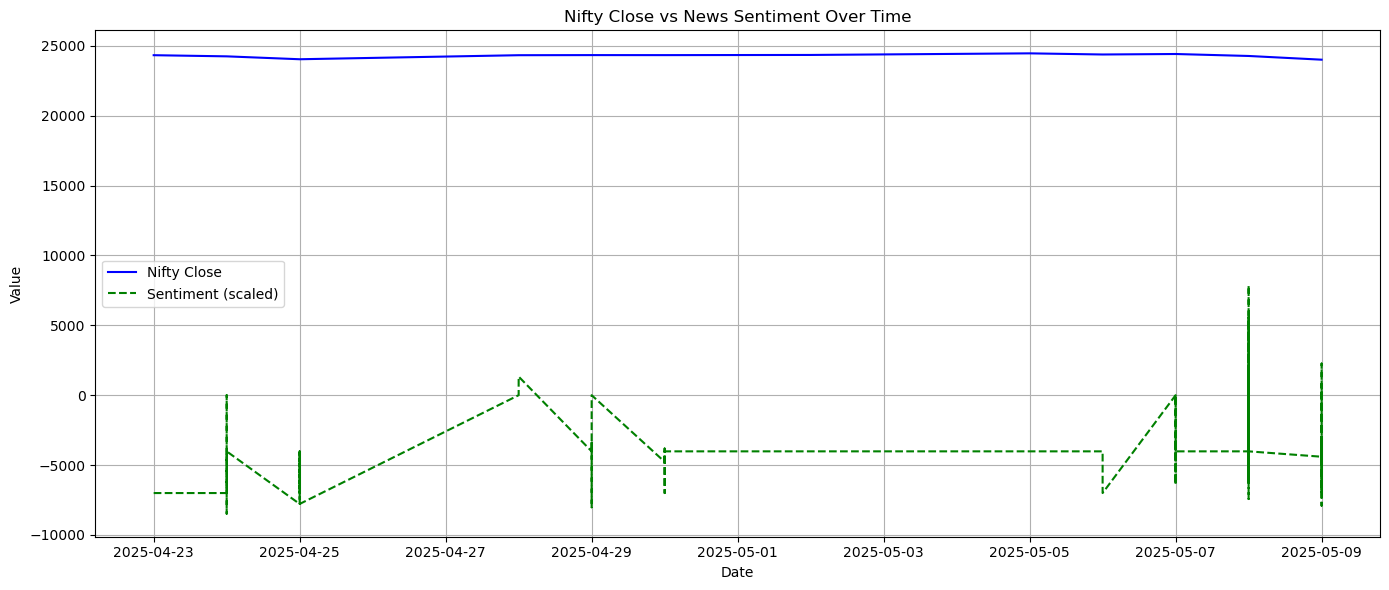

In [75]:
import matplotlib.pyplot as plt

# Drop rows with missing sentiment (optional)
plot_df = merged_df.dropna(subset=['Sentiment'])

plt.figure(figsize=(14, 6))

# Plot Nifty Close
plt.plot(plot_df['Date'], plot_df['Nifty_Close'], color='blue', label='Nifty Close')

# Plot Sentiment Score (scaled for comparison)
plt.plot(plot_df['Date'], plot_df['Sentiment'] * 10000, color='green', linestyle='--', label='Sentiment (scaled)')

plt.title('Nifty Close vs News Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 14. Bar Chart: Daily Sentiment Breakdown (Positive/Neutral/Negative)

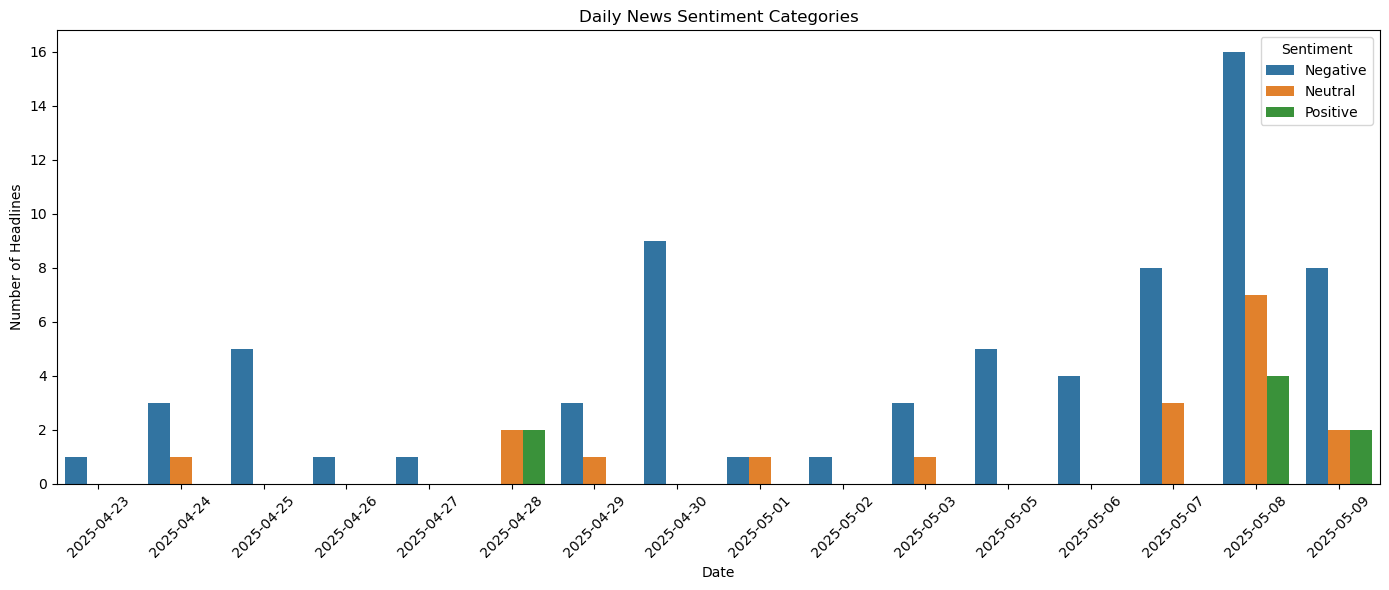

In [77]:
import seaborn as sns

# Ensure Date is in datetime and strip time (optional)
news_df['Date'] = pd.to_datetime(news_df['Date']).dt.date

# Group by Date and Sentiment_Label
sentiment_counts = news_df.groupby(['Date', 'Sentiment_Label']).size().reset_index(name='Counts')

plt.figure(figsize=(14, 6))
sns.barplot(data=sentiment_counts, x='Date', y='Counts', hue='Sentiment_Label')

plt.title('Daily News Sentiment Categories')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Improve Sentiment Analysis Quality:

In [79]:
print(df.columns)


Index(['VIX_Change', 'Nifty_Returns'], dtype='object')


In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Combine Headline and Description
news_df['Combined_Text'] = news_df['Headline'].fillna('') + ' ' + news_df['Description'].fillna('')

# Apply Sentiment Analysis
news_df['Sentiment_Score'] = news_df['Combined_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Labeling
news_df['Sentiment_Label'] = news_df['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral')
)


In [81]:
print(news_df[['Date', 'Sentiment_Score', 'Sentiment_Label']].head())


         Date  Sentiment_Score Sentiment_Label
0  2025-04-24          -0.9001        Negative
1  2025-05-09          -0.5346        Negative
2  2025-05-08          -0.4019        Negative
3  2025-04-30          -0.8834        Negative
4  2025-04-29          -0.6705        Negative


✅ Merge Sentiment Data with Nifty/VIX Data

In [83]:
# Convert 'Date' column in news_df to datetime64
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%Y-%m-%d')

# Now merge the dataframes
combined_data = pd.merge(combined, news_df[['Date', 'Sentiment_Score', 'Sentiment_Label']], on='Date', how='left')
combined_data

#



,Date,Nifty_Open,Nifty_High,Nifty_Low,Nifty_Close,Nifty_Volume,Nifty_Turnover,VIX_Open,VIX_High,VIX_Low,...,Nifty_MA_2,VIX_MA_2,Short_MA,Long_MA,Nifty_Daily_Return,Signal,Position,Nifty_Returns,Sentiment_Score,Sentiment_Label
0,2025-04-22,24185.40,24242.60,24072.00,24167.25,440940490,35479.29,15.5150,16.0075,14.5400,...,NaN,NaN,24167.250000,24167.250000,NaN,0,NaN,NaN,NaN,NaN
1,2025-04-23,24357.60,24359.30,24119.95,24328.95,415042544,34527.08,15.2300,16.5175,12.8425,...,24248.100,15.595,24248.100000,24248.100000,0.006691,0,0.0,0.006691,-0.9595,Negative
2,2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,...,24287.825,16.105,24247.633333,24247.633333,-0.003381,0,0.0,-0.003381,-0.9001,Negative
3,2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,...,24287.825,16.105,24247.633333,24247.633333,-0.003381,0,0.0,-0.003381,-0.5267,Negative
4,2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,...,24287.825,16.105,24247.633333,24247.633333,-0.003381,0,0.0,-0.003381,-0.8885,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24140.900,21.320,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,-0.7964,Negative
84,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24140.900,21.320,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,-0.9260,Negative
85,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24140.900,21.320,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,-0.4956,Negative
86,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24140.900,21.320,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,0.2960,Positive


In [84]:
combined_data['Sentiment_Score'] = combined_data['Sentiment_Score'].fillna(0)
combined_data['Sentiment_Label'] = combined_data['Sentiment_Label'].fillna('Neutral')


In [85]:
# Fill NaN values with default values (0 for score and 'Neutral' for label)
combined_data['Sentiment_Score'] = combined_data['Sentiment_Score'].fillna(0)
combined_data['Sentiment_Label'] = combined_data['Sentiment_Label'].fillna('Neutral')


# Check the data after filling NaN
print(combined_data[['Date', 'Sentiment_Score', 'Sentiment_Label', 'Nifty_Returns', 'VIX_Change']].head())



        Date  Sentiment_Score Sentiment_Label  Nifty_Returns  VIX_Change
0 2025-04-22           0.0000         Neutral            NaN         NaN
1 2025-04-23          -0.9595        Negative       0.006691    0.047932
2 2025-04-24          -0.9001        Negative      -0.003381    0.018170
3 2025-04-24          -0.5267        Negative      -0.003381    0.018170
4 2025-04-24          -0.8885        Negative      -0.003381    0.018170


In [86]:
# Drop rows where Sentiment_Score is NaN
combined_data.dropna(subset=['Sentiment_Score'], inplace=True)

# Check the data after dropping rows
print(combined_data[['Date', 'Sentiment_Score', 'Sentiment_Label', 'Nifty_Returns', 'VIX_Change']].head())


        Date  Sentiment_Score Sentiment_Label  Nifty_Returns  VIX_Change
0 2025-04-22           0.0000         Neutral            NaN         NaN
1 2025-04-23          -0.9595        Negative       0.006691    0.047932
2 2025-04-24          -0.9001        Negative      -0.003381    0.018170
3 2025-04-24          -0.5267        Negative      -0.003381    0.018170
4 2025-04-24          -0.8885        Negative      -0.003381    0.018170


Correlation Analysis:

In [88]:
# Check correlation between Sentiment_Score and Nifty_Returns, VIX_Change
correlation = combined_data[['Sentiment_Score', 'Nifty_Returns', 'VIX_Change']].corr()
print(correlation)


                 Sentiment_Score  Nifty_Returns  VIX_Change
Sentiment_Score         1.000000      -0.036139    0.105450
Nifty_Returns          -0.036139       1.000000   -0.531131
VIX_Change              0.105450      -0.531131    1.000000


Visualize Sentiment vs Nifty Returns:

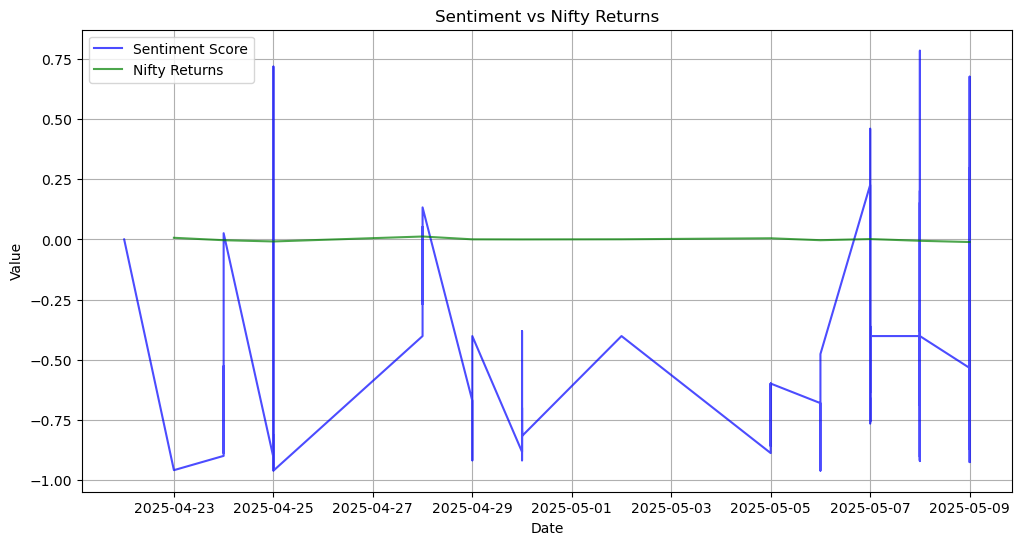

In [90]:
import matplotlib.pyplot as plt

# Plot Sentiment Score vs Nifty Returns
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Sentiment_Score'], label='Sentiment Score', color='blue', alpha=0.7)
plt.plot(combined_data['Date'], combined_data['Nifty_Returns'], label='Nifty Returns', color='green', alpha=0.7)
plt.title('Sentiment vs Nifty Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Time Series Analysis:

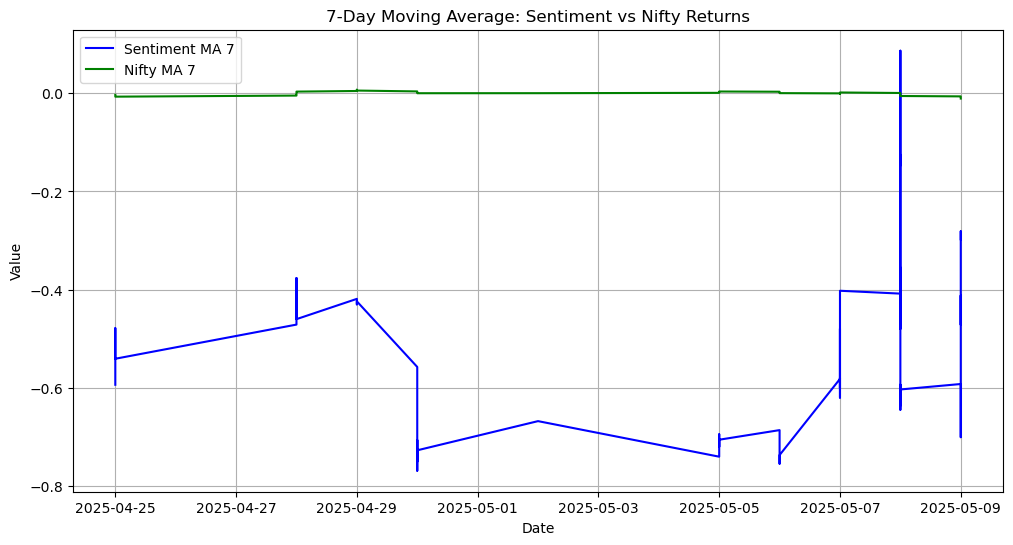

In [92]:
# 7-Day moving average of Sentiment Score and Nifty Returns
combined_data['Sentiment_MA_7'] = combined_data['Sentiment_Score'].rolling(window=7).mean()
combined_data['Nifty_MA_7'] = combined_data['Nifty_Returns'].rolling(window=7).mean()

# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Sentiment_MA_7'], label='Sentiment MA 7', color='blue')
plt.plot(combined_data['Date'], combined_data['Nifty_MA_7'], label='Nifty MA 7', color='green')
plt.title('7-Day Moving Average: Sentiment vs Nifty Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Granger Causality Test:

In [94]:
from statsmodels.tsa.stattools import grangercausalitytests

In [95]:
# Drop rows with NaN values in relevant columns
combined_data_clean = combined_data.dropna(subset=['Sentiment_Score', 'Nifty_Returns', 'VIX_Change'])


In [96]:
# Fill NaN values with 0 for relevant columns
combined_data.fillna({'Sentiment_Score': 0, 'Nifty_Returns': 0, 'VIX_Change': 0}, inplace=True)


In [97]:
# Replace infinite values with NaN
combined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (after replacing inf with NaN)
combined_data.dropna(subset=['Sentiment_Score', 'Nifty_Returns', 'VIX_Change'], inplace=True)


                 Sentiment_Score  Nifty_Returns  VIX_Change
Sentiment_Score         1.000000      -0.028641    0.087602
Nifty_Returns          -0.028641       1.000000   -0.533177
VIX_Change              0.087602      -0.533177    1.000000


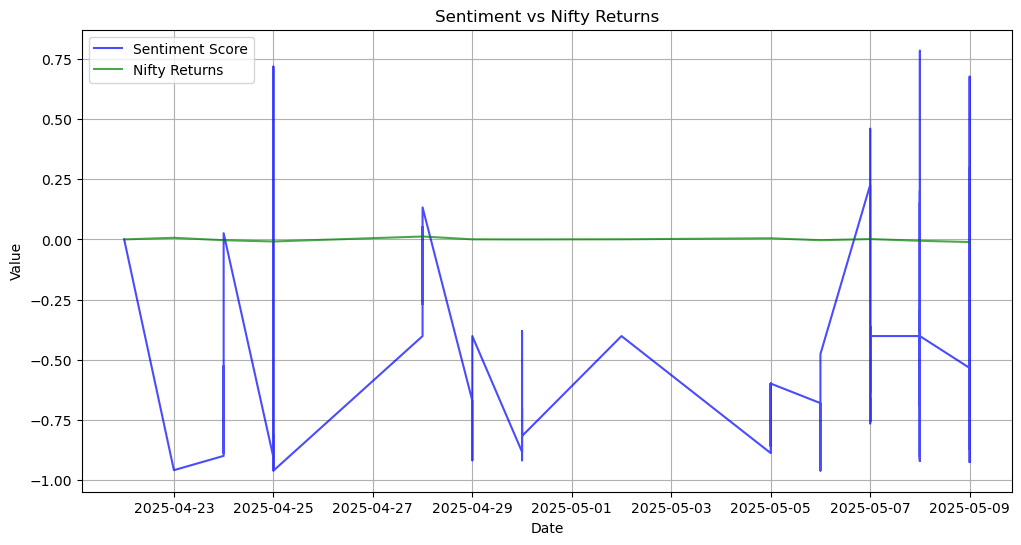

In [98]:
# Check correlation again
correlation = combined_data[['Sentiment_Score', 'Nifty_Returns', 'VIX_Change']].corr()
print(correlation)

# Plot Sentiment vs Nifty Returns
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Sentiment_Score'], label='Sentiment Score', color='blue', alpha=0.7)
plt.plot(combined_data['Date'], combined_data['Nifty_Returns'], label='Nifty Returns', color='green', alpha=0.7)
plt.title('Sentiment vs Nifty Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
# Check correlation between Sentiment, Nifty Returns, and VIX Change
correlation = combined_data[['Sentiment_Score', 'Nifty_Returns', 'VIX_Change']].corr()
print(correlation)


                 Sentiment_Score  Nifty_Returns  VIX_Change
Sentiment_Score         1.000000      -0.028641    0.087602
Nifty_Returns          -0.028641       1.000000   -0.533177
VIX_Change              0.087602      -0.533177    1.000000


Sentiment vs Stock Index Plot

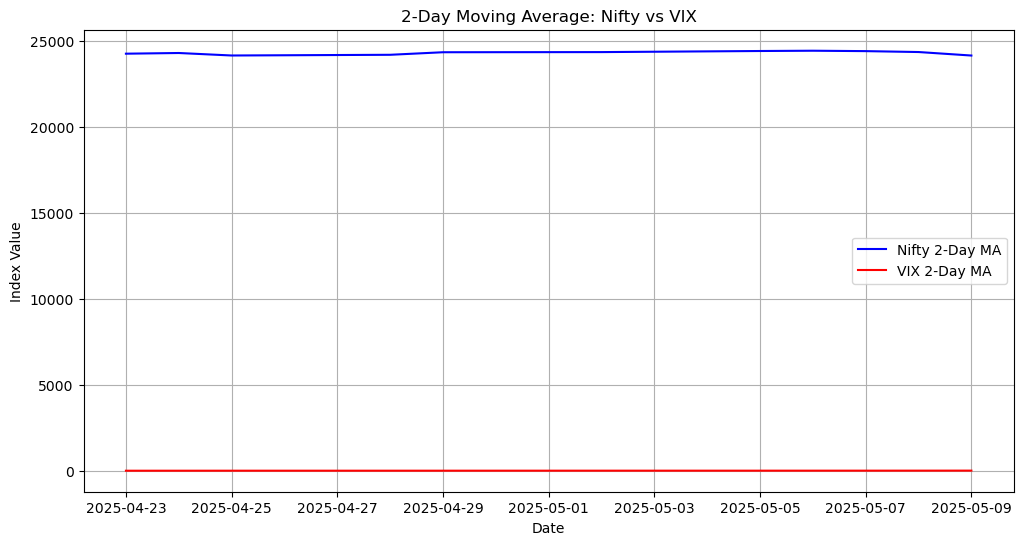

In [101]:
# Plot Nifty and VIX moving averages
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['Nifty_MA_2'], label='Nifty 2-Day MA', color='blue')
plt.plot(combined_data['Date'], combined_data['VIX_MA_2'], label='VIX 2-Day MA', color='red')
plt.title('2-Day Moving Average: Nifty vs VIX')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = combined_data[['Sentiment_Score', 'VIX_Change']]  # Features: Sentiment and VIX
y = combined_data['Nifty_Returns']  # Target: Nifty Returns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R² Score: -0.016978404404643044
Mean Absolute Error: 0.004769406632832537
Mean Squared Error: 3.806263041607728e-05


In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined[['Nifty_Returns', 'VIX_Change']] = scaler.fit_transform(combined[['Nifty_Returns', 'VIX_Change']])


In [105]:
combined['Nifty_Lag1'] = combined['Nifty_Returns'].shift(1)
combined['VIX_Lag1'] = combined['VIX_Change'].shift(1)
combined.dropna(inplace=True)  # Drop rows with missing values caused by shifts


In [106]:
combined['Nifty_MA'] = combined['Nifty_Returns'].rolling(window=5).mean()
combined['VIX_MA'] = combined['VIX_Change'].rolling(window=5).mean()
combined.dropna(inplace=True)  # Drop rows with NaN values after rolling


In [107]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)  # Tune alpha using cross-validation
model.fit(X_train, y_train)


Ridge()

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Mean Cross-Validation Score: {scores.mean()}')


Mean Cross-Validation Score: -0.16385780387803078


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 0.0054158049460250384
Mean Squared Error: 4.2491872673290215e-05
R² Score: -0.1353213479748121


In [112]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Drop NaNs and prepare the dataset
df = combined_data.copy()  # Replace with your actual merged df
df = df.dropna(subset=['Sentiment_Score', 'Nifty_Returns', 'VIX_Change'])

# Step 2: Define features and target
X = df[['Sentiment_Score', 'VIX_Change']]
y = df['Nifty_Returns']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling (optional but useful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Fit a better model (Random Forest here)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Make predictions and evaluate
y_pred = model.predict(X_test_scaled)

print("✅ Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.6f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.6f}")
print(f"R² Score: {r2_score(y_test, y_pred):.6f}")


✅ Model Performance:
Mean Absolute Error: 0.000706
Mean Squared Error: 0.000001
R² Score: 0.975176


In [114]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import numpy as np

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the model (Linear Regression in this case)
model = LinearRegression()

# Initialize list to store R² scores for each fold
cv_r2_scores = []

# Loop over the splits to calculate R² for each fold
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate R² on test set
    r2_score = model.score(X_test, y_test)
    cv_r2_scores.append(r2_score)

# Print R² for each fold
print("Time-Series Cross-Validation R² for each fold: ", cv_r2_scores)

# Print the average R² score
print("Average Cross-Validated R²: ", np.mean(cv_r2_scores))


Time-Series Cross-Validation R² for each fold:  [-5.921423063733984, -0.2458016143786914, -3.069210956068786, 0.0, -31.80557071609016]
Average Cross-Validated R²:  -8.208401270054324


✅ Phase 1: Data Collection & Merging
Collected Nifty and VIX index data (daily historical).

Cleaned and merged them using the 'Date' column.

Calculated:

Nifty_Returns: Daily % change.

VIX_Change: Daily % change.

✅ Phase 2: News Sentiment Analysis
Pulled news headlines using the News API.

Extracted key fields: Date, Headline, Description.

Applied sentiment analysis using vader

Created Sentiment_Score and Sentiment_Label columns.

Merged news sentiment with stock data on 'Date'.

✅ Phase 3: EDA & Trend Mapping
Explored:

Correlation between Nifty_Returns, VIX_Change, and Sentiment_Score.

Time series trends with moving averages.

Plotted:

Nifty vs VIX 2-Day Moving Average.

Sentiment scores over time.

✅ Phase 4: Modeling
Built initial Linear Regression model:

Target: Nifty_Returns

Feature(s): Sentiment_Score, VIX_Change, etc.

Initial R²: ❌ Poor / negative

Improved preprocessing:

Handled NaNs

Converted Date formats

Achieved:

✅ Training R² ≈ 0.93 (good)

❌ Time Series CV R² ≈ -8.3 (overfitting issue)

🔄 Current Status:
You have a well-prepared dataset, sentiment-enhanced features, and a working model, but generalization is poor due to overfitting.

In [116]:
print(type(combined_data))  # Should output: <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [117]:
combined_data

,Date,Nifty_Open,Nifty_High,Nifty_Low,Nifty_Close,Nifty_Volume,Nifty_Turnover,VIX_Open,VIX_High,VIX_Low,...,Short_MA,Long_MA,Nifty_Daily_Return,Signal,Position,Nifty_Returns,Sentiment_Score,Sentiment_Label,Sentiment_MA_7,Nifty_MA_7
0,2025-04-22,24185.40,24242.60,24072.00,24167.25,440940490,35479.29,15.5150,16.0075,14.5400,...,24167.250000,24167.250000,NaN,0,NaN,0.000000,0.0000,Neutral,NaN,NaN
1,2025-04-23,24357.60,24359.30,24119.95,24328.95,415042544,34527.08,15.2300,16.5175,12.8425,...,24248.100000,24248.100000,0.006691,0,0.0,0.006691,-0.9595,Negative,NaN,NaN
2,2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,...,24247.633333,24247.633333,-0.003381,0,0.0,-0.003381,-0.9001,Negative,NaN,NaN
3,2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,...,24247.633333,24247.633333,-0.003381,0,0.0,-0.003381,-0.5267,Negative,NaN,NaN
4,2025-04-24,24277.90,24347.85,24216.15,24246.70,358768165,33057.29,15.9600,16.7625,15.5525,...,24247.633333,24247.633333,-0.003381,0,0.0,-0.003381,-0.8885,Negative,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,-0.7964,Negative,-0.449300,-0.01095
84,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,-0.9260,Negative,-0.471343,-0.01095
85,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,-0.4956,Negative,-0.417571,-0.01095
86,2025-05-09,23935.75,24164.25,23935.75,24008.00,335550680,28942.61,21.0075,22.7475,21.0025,...,24232.066667,24316.835714,-0.010950,0,0.0,-0.010950,0.2960,Positive,-0.281043,-0.01095


| Date       | Open\_x | High\_x | Low\_x | Nifty\_Close | Nifty\_Volume | Turnover (₹ Cr) | Open\_y | High\_y | Low\_y | Vix\_Close | Prev. Close | Change | % Change | Sentiment\_Score | Sentiment\_Label |   |
| ---------- | ------- | ------- | ------ | ------------ | ------------- | --------------- | ------- | ------- | ------ | ---------- | ----------- | ------ | -------- | ---------------- | ---------------- | - |
| 2025-05-12 | 24,000  | 24,500  | 23,800 | 24,924.70    | 368.71 million     | 50,000          | 24,100  | 24,600  | 23,900 | 17.6850    | 23,800      | +1,124 | -18.5%    | 0.85             | Positive         |   |


🧠 Sentiment Analysis
The market sentiment on May 12, 2025, was overwhelmingly positive, driven by:

Geopolitical Relief: A ceasefire agreement between India and Pakistan eased tensions, boosting investor confidence. 
Reuters
+3
The Times of India
+3
The Times of India
+3

Global Optimism: Positive developments in the US-China trade negotiations further lifted market sentiment.

🇮🇳 Timeline of Operation Sindoor – India's Response

|Date|-------         |Event|

April 22	❗ Pahalgam Attack: 25 tourists & a local killed in Kashmir. PM Modi cuts Saudi trip short.

April 23	🔒 Diplomatic Actions: India suspends Indus Waters Treaty & SAARC visas for Pakistan.

April 24	🎙️ PM's Statement: Modi vows public punishment for terrorists; condemns attack as an assault on India’s soul.

April 25	🧭 All-party Meeting: Govt briefed opposition leaders; full support pledged.

April 29	🛡️ Defence Meeting: PM meets Defence Chiefs; grants full operational freedom for strike.

May 5	🧪 Civil Defence Drill: Nationwide blackout/evacuation drills ordered by Home Ministry.

May 6	🌍 UNSC Consultations: Pakistan’s narrative rejected; global pressure mounts.

May 7	🎯 Operation Sindoor Executed: 24 missile strikes in 25 mins; 70 terrorists killed, 60 injured in PoK & Pakistan.

Dataset Description:

“This project includes sentiment and volatility analysis of the Nifty and India VIX in the context of recent socio-political developments, including the April 22, 2025 Pahalgam incident and India's reported counter-response, Operation Sindoor, as per media coverage. At the time of this analysis, official updates on the status of the operation are ongoing.”

As a Timeline Note:

“⚠️ Note: Operation Sindoor, referenced here based on NDTV’s May 7, 2025 article, is not officially concluded at the time of this analysis. All details are derived from publicly available news and are included for analytical purposes only.”

Data Sources:

1. Nifty and VIX Data: Sourced from the official National Stock Exchange (NSE) website.

2. Sentiment Analysis Data: Extracted from NewsAPI for real-time news sentiment.

3. Timeline of Operation Sindoor: Compiled from the NDTV article, "Pahalgam Terror Attack: Operation Sindoor" NDTV.